In [ ]:
!pip install python-dotenv
!pip install langchain
!pip install langchain-core
!pip install langchain-community
!pip install langchain-openai

## OPENAI API KEY 생성

LangChain과 연동해서 사용할 상용 LLM으로 OpenAI의 제품을 사용해보겠습니다.

[platform.openai.com/api-keys](https://platform.openai.com/api-keys)에서 본인 OpenAI 계정으로 API Key를 생성할 수 있습니다.

API를 사용하기 위해서는 Credit을 결제해야 하며, 최소 $5부터 결제할 수 있습니다.

**강의 동안은 임시 API KEY값이 주어집니다.**

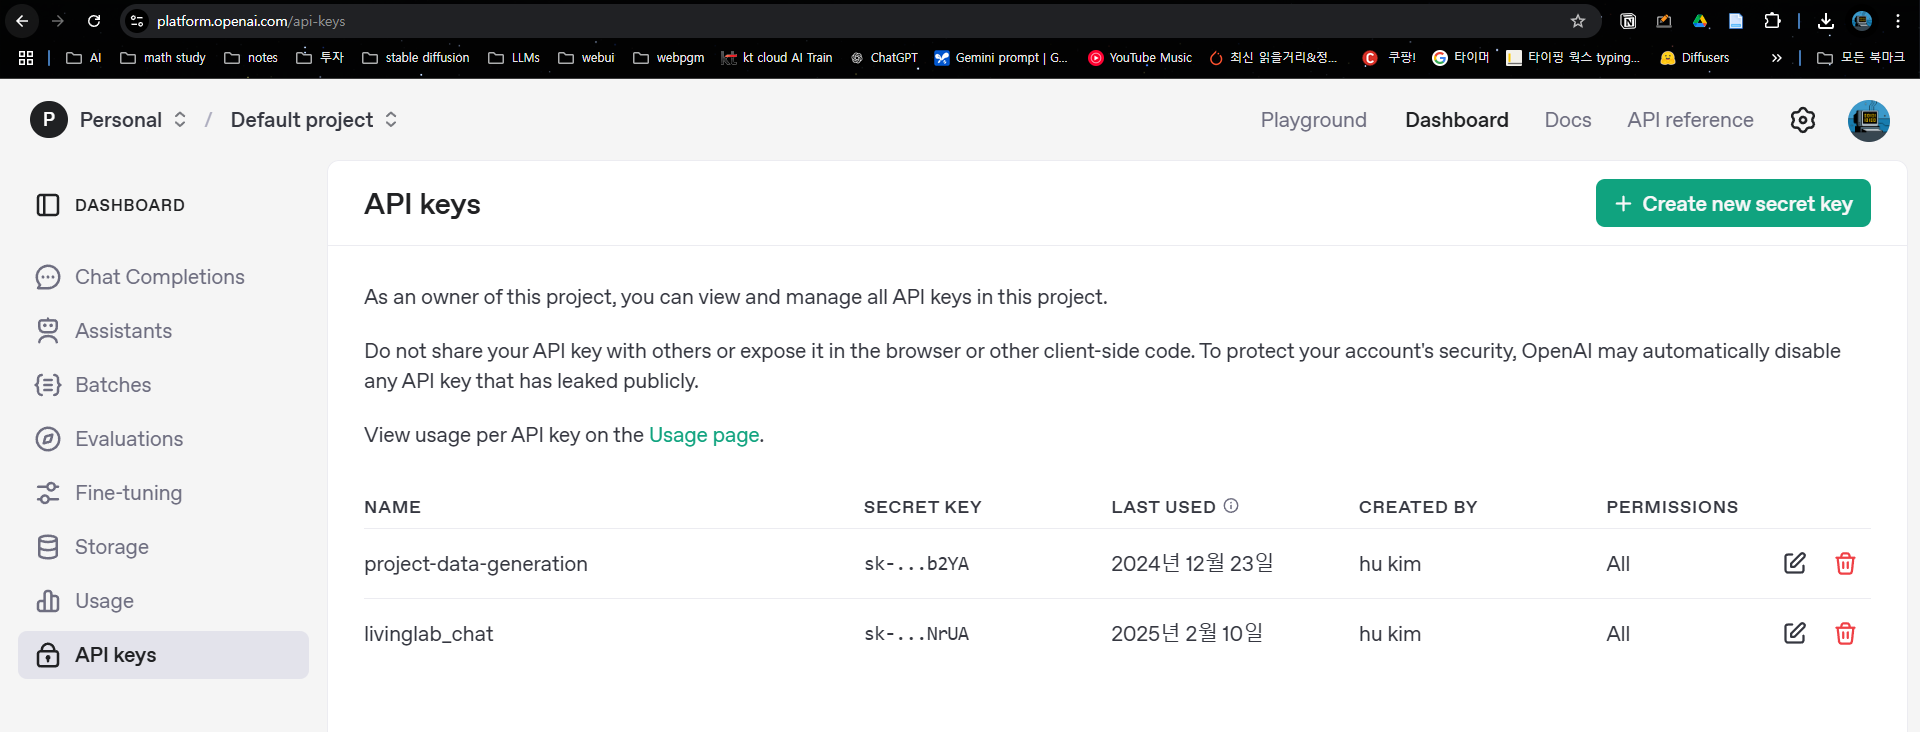

## LangSmith 사용

LangChain으로 빌드하는 많은 애플리케이션에는 LLM 호출을 여러 번 호출하는 여러 단계가 포함됩니다. 이러한 애플리케이션이 점점 더 복잡해짐에 따라 체인이 예상보다 느리거나 에이전트 내부의 루핑, 오류를 검사할 수 있는 것이 중요해집니다. 이를 수행하는 가장 좋은 방법은 [LangSmith](https://smith.langchain.com/)를 사용하는 것입니다 .

위 링크로 들어가 Set up tracing을 통해 API Key를 생성하고 monitoring을 시작합니다.

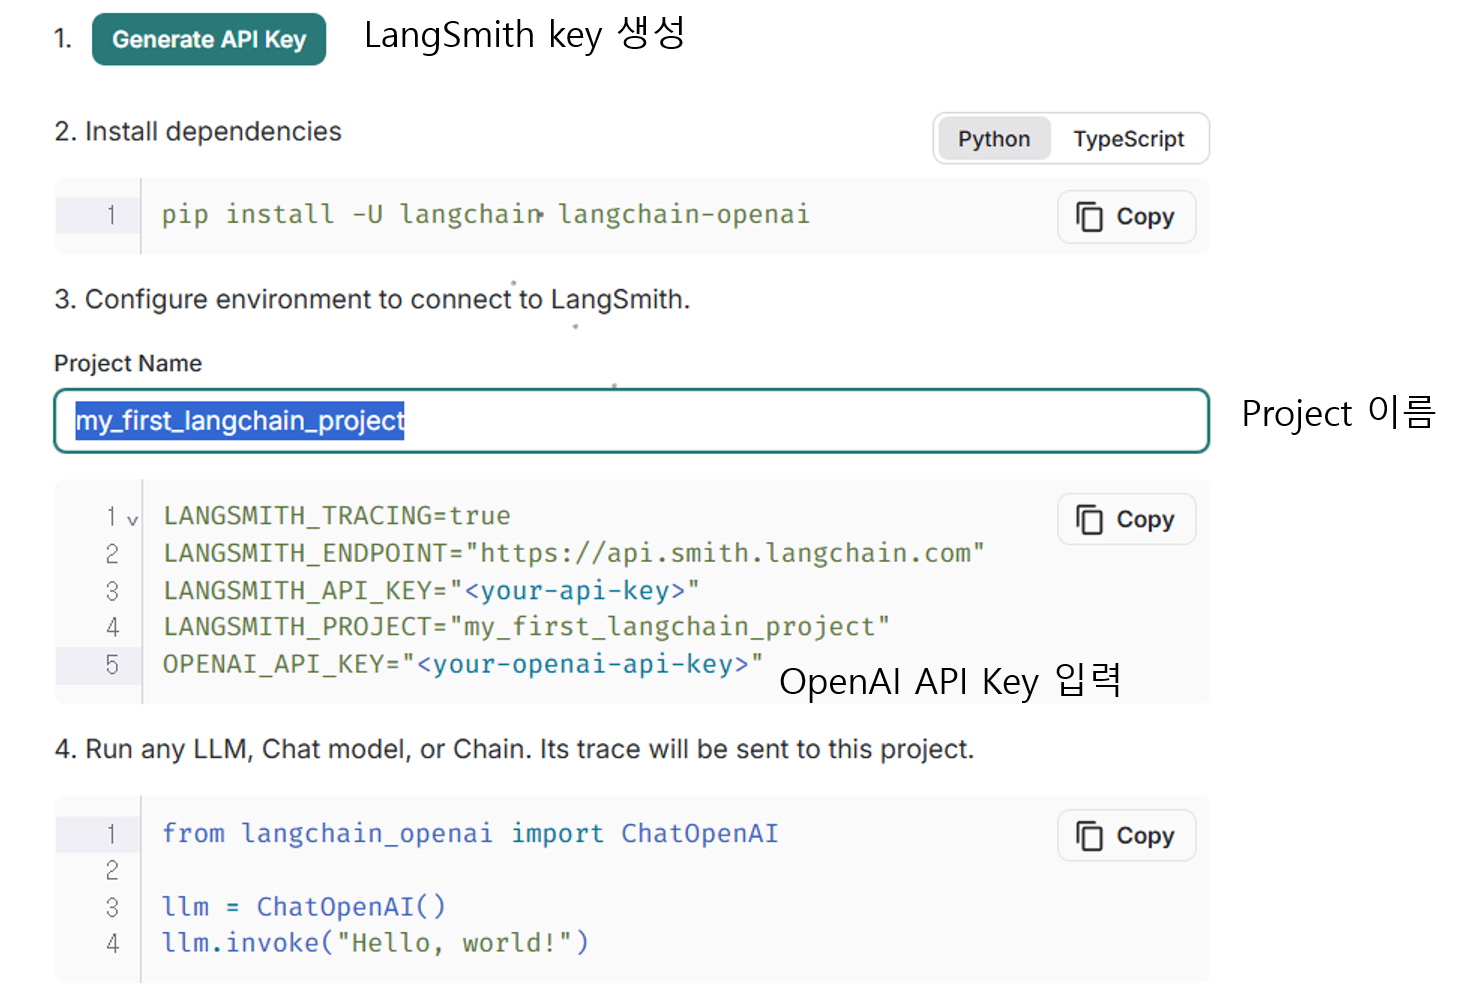

서비스를 활용하기 위해 API KEY 값을 가져와야 합니다. 우리가 옵션이 있습니다.

**옵션1. 직접 KEY 값을 환경 변수에 저장하는 방식**

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

In [ ]:
_set_env("OPENAI_API_KEY")

**옵션 2. .env 파일을 만들어서 KEY 값을 관리하는 방식 (추천)**

현재 경로에 .env 파일을 만들고, OPENAI KEY와 LANGCHAIN KEY 정보를 함께 넣어줍니다.

형식은 다음과 같습니다...



.env의 형식은 다음과 같습니다 (아래를 복사하지 마시고, 본인 계정의 LangSmith 정보를 가져와야 합니다.)
```
LANGSMITH_TRACING=true
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY="lsv2_pt_31dfbd8d34e999df7a0e8715c0b5d_dsafareggfd"
LANGSMITH_PROJECT="my_first_langchain_project"
OPENAI_API_KEY="sk-proj-bIjXoUoqB_jXE1R4tIZDq_wfdsgrefdbgfdnEdQH8rMsRdoCixsgQfYP4ngxMrpRFkIEBh97BtR8T3BlbkFJxigmCGyusLAihd9aB0s8sShLvgzf3uQAliroXG39giX5_GVS3jW2jl263LYydBxq4CQ6TzQY8A"
```





.env 파일 로드

In [ ]:
from dotenv import load_dotenv
import os

# API KEY 정보를 로드합니다. 파일 이름은 앞에 comma가 있는 ".env" 파일여야 합니다!
load_dotenv()
print(f"[API KEY]\n{os.environ['OPENAI_API_KEY']}")

## LangChain llm 생성

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
llm.invoke("안녕하세요? 당신은 어떤 모델인가요?")

우리의 첫 번째 질의가 정상적으로 실행됐다면, LangSmith에도 자동으로 로깅이 됐을 것입니다.

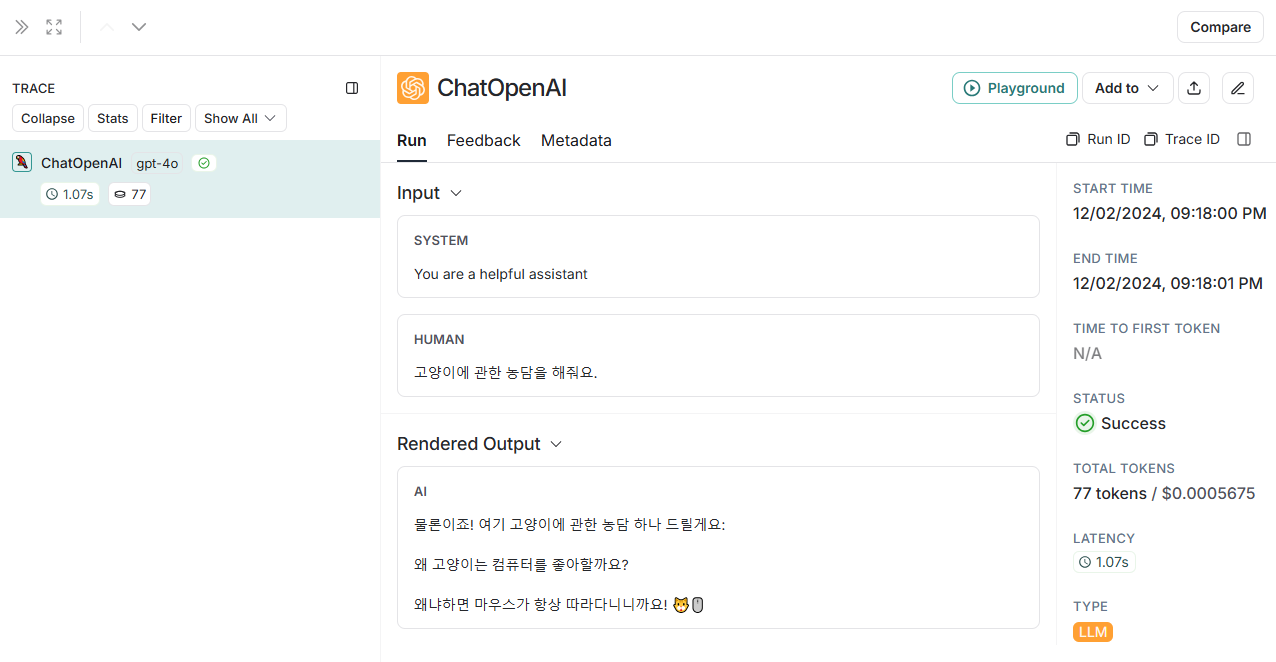

# LangChain key concepts

LangChain의 기초를 배우기 위해 다음과 같은 개념들을 먼저 알아야 합니다.

- [모델] LangChain의 중심에는 모델이 있습니다. 모델은 우리가 언어 작업을 수행하기 위해 사용하는 도구로, 크게 LLM과 Chat Models로 나뉩니다.
- [프롬프트 템플릿] 프롬프트 템플릿은 모델이 정확하게 원하는 작업을 수행하도록 입력을 설계하는 방식입니다.
- [아웃풋 파서] 모델이 생성하는 출력은 단순한 텍스트일 수도 있고, 특정 형식(JSON, 숫자 등)으로 변환해야 할 수도 있습니다. 아웃풋 파서는 이처럼 모델의 출력을 원하는 형식으로 가공하여 실질적으로 활용할 수 있도록 도와줍니다.

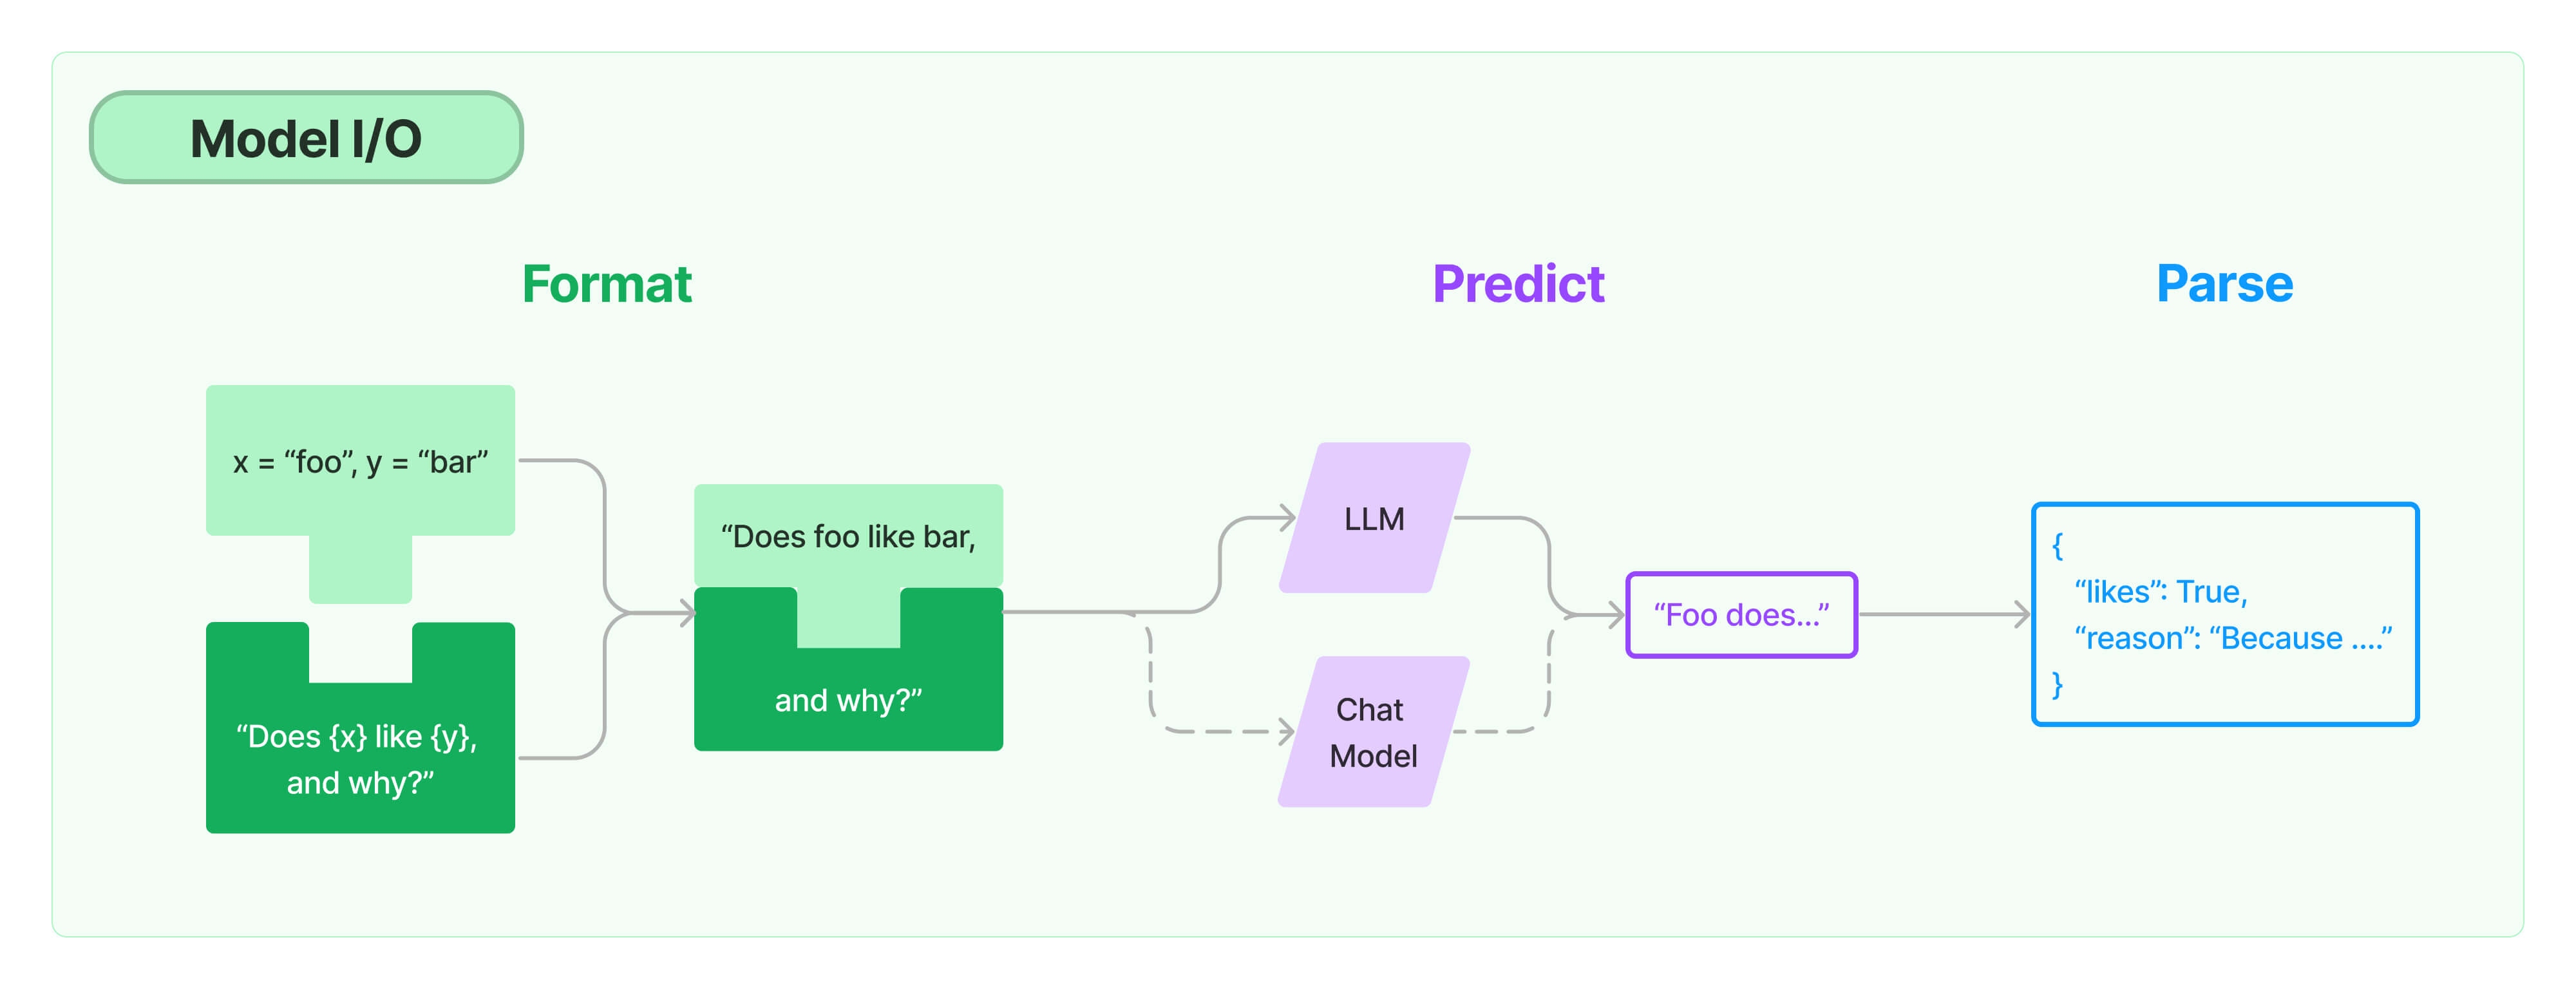

# Model

LangChain의 모델에 대해 알아보겠습니다. ChatModel은 LangChain Runnables의 인스턴스로, 모델과 상호작용하기 위한 표준 인터페이스를 제공합니다. 모델을 간단히 호출하려면 .invoke 메서드에 메시지 목록을 전달하면 됩니다.

Chat models 구성 시 표준화된 매개 변수입니다. api_key, base_url 등은 이미 환경변수에 의해 설정되어 있기 때문에 model_name, temperature, max_tokens 등이 우리가 설정해주면 되는 속성입니다.

- model_name: 모델의 이름
- temperature: 샘플링 온도 (높을 수록 창의적, 낮을 수록 안정적)
- timeout: 요청 시간 제한
- max_tokens: 생성할 최대 토큰 수
- stop: 기본 중지 시퀀스
- max_retries: 요청을 재시도할 최대 횟수
- api_key: 모델 공급자의 API 키
- base_url: 요청을 보낼 엔드포인트

In [ ]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "장단기 금리차가 무엇인가요?"

# 질의
response = llm.invoke(question)
print(f"[답변]: {response}")

In [ ]:
print(response.content)

In [ ]:
response.response_metadata

```
# 객체 생성 시 LogProb 활성화
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-3.5-turbo",  # 모델명
).bind(logprobs=True)
```




SystemMessage와 HumanMessage 객체를 사용하여 [메시지](https://python.langchain.com/docs/concepts/messages/)를 정의합니다.

In [ ]:
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage

messages = [
    SystemMessage("Translate the following from English into Italian"),
    HumanMessage("hi!"),
]

llm.invoke(messages)

그 외 아래와 같은 방법으로도 대화형 프롬프팅(Chat prompting)이 가능합니다.

In [ ]:
llm.invoke("Hello")

In [ ]:
llm.invoke([{"role": "user", "content": "Hello"}])

In [ ]:
llm.invoke([HumanMessage("Hello")])

stream 메서드는 LLM의 출력 토큰을 실시간으로 스트리밍하며, 출력은 순차적으로 제공합니다.

In [ ]:
for token in llm.stream(messages):
    print(token.content, end="|")

sync stream API:

In [ ]:
chunks = []
for chunk in llm.stream("what color is the sky?"):
    chunks.append(chunk)
    print(chunk.content, end="|", flush=True)

async astream API

In [ ]:
chunks = []
async for chunk in llm.astream("what color is the sky?"):
    chunks.append(chunk)
    print(chunk.content, end="|", flush=True)

In [ ]:
(chunks[0] + chunks[1] + chunks[2] + chunks[3] + chunks[4]).content

챗 모델의 주요 메서드는 다음과 같습니다:

- invoke: 챗 모델과 상호작용하기 위한 기본 메서드입니다. 메시지 목록을 입력으로 받아 메시지 목록을 출력으로 반환합니다.
- stream: 챗 모델의 출력이 생성되는 대로 스트리밍할 수 있도록 지원하는 메서드입니다.
- batch: 여러 요청을 한 번에 처리하여 더 효율적으로 챗 모델을 실행할 수 있도록 지원하는 메서드입니다.
- bind_tools: 도구를 챗 모델에 바인딩하여 모델의 실행 컨텍스트에서 사용할 수 있도록 하는 메서드입니다.
- with_structured_output: 구조화된 출력을 네이티브로 지원하는 모델에 대해 invoke 메서드를 감싸는 래퍼 메서드입니다.

# Prompt Template

[Template](https://python.langchain.com/docs/concepts/prompt_templates/)은 언어모델이 사용자의 입력을 구조적으로 입력 받기 위해서 사용됩니다. Template을 통해 우리는 프롬프트를 문제에 맞게 디자인할 수 있습니다. 템플릿은 프롬프트 엔지니어링을 통한 성능 최적화에도 매우 중요한 역할을 합니다.

주요한 두 가지 템플릿 클래스가 있습니다.

- PromptTemplate
- ChatPromptTemplate

프롬프트를 템플릿 형태로 다룰 때 단일 문자열의 경우 'PromptTemplate'을 씁니다.

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("{country}의 수도의 이름은?")

In [ ]:
prompt = prompt_template.invoke({"country": "대한민국"})
prompt

In [ ]:
response = llm.invoke(prompt)
print(response.content)

Chat model처럼 메시지 목록을 포맷하는 데는 ChatPromptTemplate 씁니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    ("user", "{topic}에 관한 농담을 해줘요.")
])

prompt_template.invoke({"topic": "고양이"})

In [ ]:
prompt = prompt_template.invoke({"topic": "고양이"})
response = llm.invoke(prompt)
print(response.content)

LLM에는 자체 상태(메모리) 개념이 없습니다. 예를 들어, 후속 질문을 하는 경우:

In [ ]:
llm.invoke([HumanMessage(content="내 이름이 뭐게?")]).content


In [ ]:
llm.invoke(
    [
        HumanMessage(content="안녕, 내 이름은 김형욱이라고 해!"),
        AIMessage(content="반가워요, 오늘 어떻게 도와드릴까요?"),
        HumanMessage(content="내 이름이 뭐죠?")
    ]
)


챗봇을 구축할 때 이해해야 할 중요한 개념 중 하나는 대화 기록을 관리하는 방법입니다. 관리하지 않으면 메시지 목록이 무한대로 늘어나 LLM의 컨텍스트 창을 넘칠 가능성이 있습니다.

따라서 대화가 길어질 염려가 있을 경우,

- 전달하는 메시지의 크기를 제한하는 단계를 추가하거나
- 아래처럼 trimmer를 사용해서 어떤 메시지를 제거할지 제어하는 것이 중요합니다.

In [ ]:
# LangChain의 핵심 메시지 클래스를 불러옵니다.
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, trim_messages
from langchain_openai import ChatOpenAI


# 메시지 정리(trimming)를 위한 트리머(trimmer)를 생성합니다.
trimmer = trim_messages(
    max_tokens=65,  # 전체 메시지에서 유지할 최대 토큰 수 (모델에 따라 조정 필요)
    strategy="last",  # 최신 메시지를 우선 유지하고 오래된 메시지를 삭제하는 방식
    token_counter=ChatOpenAI(model="gpt-4o"),  # 토큰 개수를 계산할 모델 설정
    start_on="human",  # 대화의 시작점을 HumanMessage로 설정 (또는 SystemMessage 이후의 HumanMessage)
    end_on=("human", "tool"),  # 대화의 끝을 HumanMessage 또는 ToolMessage로 유지
    include_system=True,  # 시스템 메시지를 유지 (시스템 메시지는 모델에 중요한 역할을 함)
    allow_partial=False,  # 메시지가 중간에서 잘리는 것을 방지 (완전한 메시지만 유지)
)

# 대화 이력을 리스트로 정의합니다.
messages = [
    SystemMessage(content="you're a good assistant"),  # 시스템 메시지 (모델에 대한 기본 지시)
    HumanMessage(content="hi! I'm Bob"),  # 사용자 메시지
    AIMessage(content="hi!"),  # AI 응답
    HumanMessage(content="I like vanilla ice cream"),  # 사용자 메시지
    AIMessage(content="nice"),  # AI 응답
    HumanMessage(content="what's 2 + 2"),  # 사용자 메시지
    AIMessage(content="4"),  # AI 응답
    HumanMessage(content="thanks"),  # 사용자 메시지
    AIMessage(content="no problem!"),  # AI 응답
    HumanMessage(content="having fun?"),  # 사용자 메시지
    AIMessage(content="yes!"),  # AI 응답
]

# 트리머를 사용하여 메시지 목록을 정리합니다.
messages = trimmer.invoke(messages)

In [ ]:
messages

# Output parsers

출력 파서는 모델의 응답을 정해진 형식(예: JSON, Pydantic 모델)로 받을 수 있어 후처리를 쉽게 할 수 있습니다.

에러 방지나 데이터 검증에 유리하며, 복잡한 응답을 처리하기 용이합니다.

아래와 같이 대출상담과 관련한 이메일 문의가 있다고 가정하겠습니다.

In [ ]:
email_conversation = """안녕하세요, 저는 김민수라고 합니다. 나이는 35세이고 현재 서울에 거주하고 있습니다.
현재 APEX Solutions라는 IT 회사에서 근무하고 있으며, 연봉은 세전 기준으로 약 6,500만 원입니다.
대출을 받고자 하는 이유는 신혼집 마련을 위해 아파트를 구매하려는 목적입니다.
현재 매매하려는 아파트의 가격은 5억 원 정도이고, 제 자산 중 약 1억 5천만 원을 계약금으로 준비할 수 있습니다.
따라서 대출로 약 3억 5천만 원을 실행하려고 합니다.

저는 신용등급이 2등급으로 안정적이고, 지난 10년 동안 큰 금융 거래 문제 없이 생활해왔습니다.
현재 대출 상담을 받으려는 이유는 금리와 상환 조건을 미리 확인하고, 저에게 적합한 대출 상품을 찾고 싶어서입니다.
가능한 한 상환 기간을 20년으로 설정하고, 중간에 일부 상환이 가능하도록 설계된 상품을 찾고 싶습니다.
또, 대출 실행이 가능한 시점과 관련해 필요한 서류와 절차도 알고 싶습니다.

추가로, 제가 다니고 있는 회사에서 곧 승진 기회가 있어 연봉이 조금 더 오를 가능성도 있습니다.
이 점이 대출 한도나 조건에 긍정적인 영향을 줄 수 있을지 궁금합니다. 감사합니다.
"""

일단 출력 파서를 쓰지 않고 다음과 같은 template을 사용하여 대화하도록 하겠습니다.

In [ ]:
from itertools import chain
from langchain_core.prompts import PromptTemplate

template = PromptTemplate.from_template(
    "다음의 이메일 내용중 중요한 내용을 추출해 주세요.\n\n{email_conversation}"
)

llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

response = llm.invoke(template.invoke({"email_conversation" : email_conversation}))

Model은 다음과 같이 이메일로부터 중요하다고 추론되는 결과를 정리해줍니다.

In [ ]:
print(response.content)

## Pydantic 출력 파서 사용

이제 출력파서를 사용해봅시다. Pydantic 출력파서를 사용해보겠습니다.

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel

# Pydantic 모델 정의
class LoanInquiry(BaseModel):
    name: str
    age: int
    company: str
    salary: int
    loan_amount: int
    purpose: str
# Output Parser 설정
parser = PydanticOutputParser(pydantic_object=LoanInquiry)

출력파서는 기본적으로 JSON 스키마를 모델에게 요구하고, 그 정보를 토대로 파싱합니다. 아래는 사전에 지정된 instruction 구문입니다.

In [ ]:
# instruction 을 출력합니다.
print(parser.get_format_instructions())

In [ ]:
template = PromptTemplate.from_template(
    """
You are a helpful assistant. Please answer the following questions in KOREAN.

QUESTION:
{question}

EMAIL CONVERSATION:
{email_conversation}

FORMAT:
{format}
"""
)

# format 에 PydanticOutputParser의 부분 포맷팅(partial) 추가
template = template.partial(format=parser.get_format_instructions())

In [ ]:
prompt = template.invoke({"question" : "이메일 내용중 주요 내용을 추출해 주세요.", "email_conversation" : email_conversation})

In [ ]:
print(prompt.text)

In [ ]:
response = llm.invoke(prompt)

In [ ]:
print(response.content)

In [ ]:
structured_output = parser.parse(response.content)
print(structured_output)

### with_structured_output 함수 사용

llm의 출력을 Pydantic 객체로 아예 변환할 수 있습니다.

In [ ]:
structured_llm = llm.with_structured_output(LoanInquiry)

In [ ]:
structured_response = structured_llm.invoke(email_conversation)

In [ ]:
structured_response

## JSON 출력 파서 사용

동일한 문제에 대해 JSON 출력 파서를 사용해봅시다!

다음 메뉴얼을 참고해서 JSON 출력파서를 구현해보세요.

- https://python.langchain.com/docs/how_to/structured_output/

### Reference
- https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/

# Chain

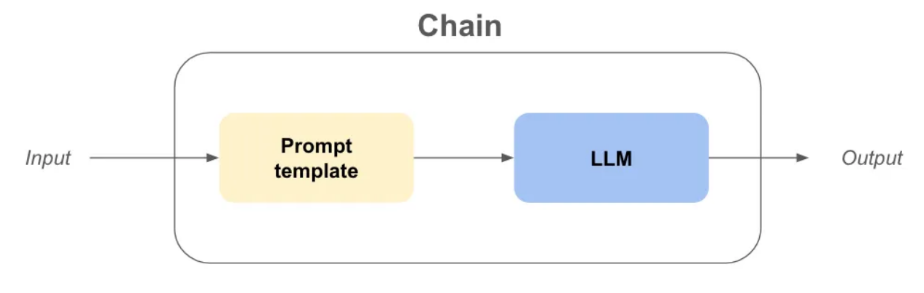

LangChain에서 chain으로 runnable component를 연결하여 복잡한 AI 워크플로우를 구현할 수 있습니다.

아래와 같이 간결한 구문으로 데이터 흐름의 순차적인 처리를 나타냅니다. invoke 함수를 통해 첫번째 component에 query를 넣습니다.

chain = prompt | model | output_parser


In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate
output_parser = StrOutputParser()

In [ ]:
# prompt 를 PromptTemplate 객체로 생성합니다.
prompt = PromptTemplate.from_template("{topic}의 정의에 대해 말해주세요.")

llm = ChatOpenAI()

chain = prompt | llm

invoke() 호출을 통해 chain을 동작시킵니다.

In [ ]:
query = "딥러닝"
chain.invoke({"topic" : query})

다음으로 Chain에 출력파서를 추가합니다.

In [ ]:
chain = prompt | llm | output_parser

In [ ]:
query = "딥러닝"
chain.invoke({"topic" : query})

In [ ]:
async for chunk in chain.astream({"topic": "토끼"}):
    print(chunk, end="|", flush=True)